In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [33]:
base_path = './data'
path_target = f'{base_path}/Y_train_1rknArQ.csv'

In [34]:
X_team = pd.read_csv('./train_team.csv')
target = pd.read_csv(path_target, sep=',')

In [114]:
target.sum()

ID           75675753
HOME_WINS        5356
DRAW             3186
AWAY_WINS        3761
dtype: int64

In [35]:
encoded_target = target.drop(columns='ID').apply(lambda x: np.where(x.to_numpy() == 1)[0][0], axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X_team.drop(columns=['ID', 'HOME_LEAGUE', 'HOME_TEAM_NAME', 'AWAY_LEAGUE', 'AWAY_TEAM_NAME']), 
    encoded_target, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
    )

In [37]:
imputer = SimpleImputer(strategy='median').fit(X_train)
X_train = imputer.transform(X_train)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
n_neighbors = np.arange(5, 70, 5)
param_grid = {
    'n_neighbors': n_neighbors,
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn = KNeighborsClassifier(n_jobs=-1)

grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=10).fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV 1/5; 1/39] START metric=euclidean, n_neighbors=5............................
[CV 2/5; 1/39] START metric=euclidean, n_neighbors=5............................
[CV 3/5; 1/39] START metric=euclidean, n_neighbors=5............................
[CV 4/5; 1/39] START metric=euclidean, n_neighbors=5............................
[CV 5/5; 1/39] START metric=euclidean, n_neighbors=5............................
[CV 1/5; 2/39] START metric=euclidean, n_neighbors=10...........................
[CV 2/5; 2/39] START metric=euclidean, n_neighbors=10...........................
[CV 3/5; 2/39] START metric=euclidean, n_neighbors=10...........................
[CV 2/5; 1/39] END metric=euclidean, n_neighbors=5;, score=0.432 total time=   0.9s
[CV 4/5; 2/39] START metric=euclidean, n_neighbors=10...........................
[CV 3/5; 1/39] END metric=euclidean, n_neighbors=5;, score=0.416 total time=   0.9s
[CV 5/5; 2/39] START metric=euclidean, n_

/home/lucas/miniconda3/envs/data-challenge/lib/python3.13/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [43]:
print(grid_search.best_params_)
print(grid_search.score(imputer.transform(X_test), y_test))

{'metric': 'manhattan', 'n_neighbors': np.int64(65)}
0.4717594473791142


Text(0.5, 1.0, 'chebyshev')

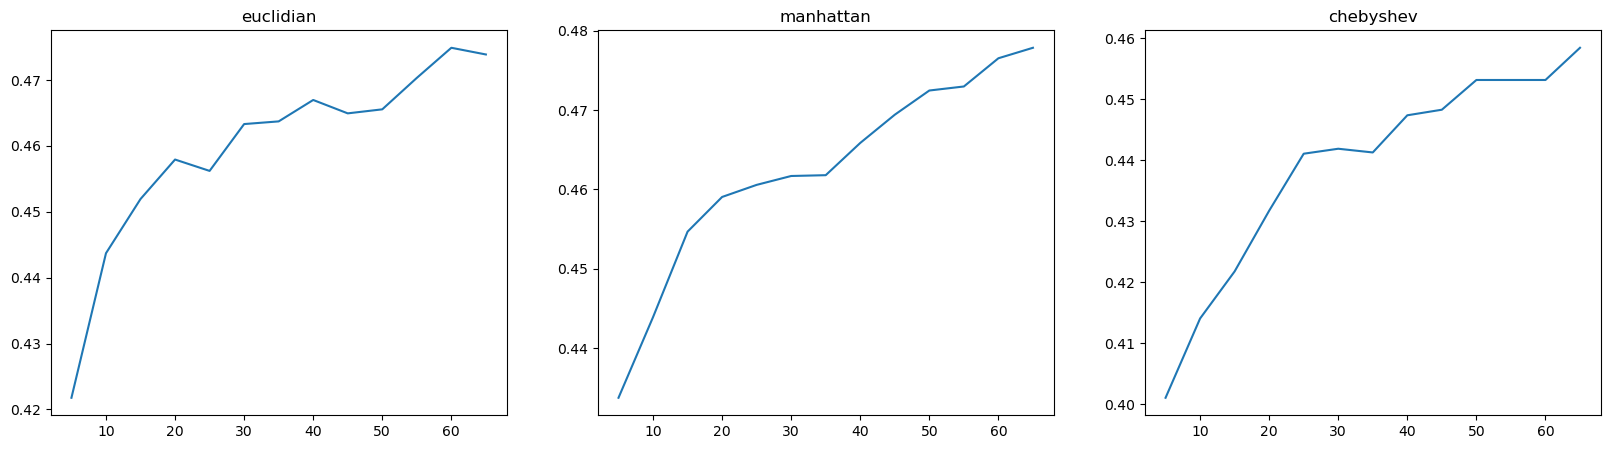

In [92]:
euclidian = grid_search.cv_results_['mean_test_score'][:len(n_neighbors)]
manhattan = grid_search.cv_results_['mean_test_score'][len(n_neighbors):2*len(n_neighbors)]
chebyshev = grid_search.cv_results_['mean_test_score'][2*len(n_neighbors):]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
ax1.plot(n_neighbors, euclidian)
ax1.set_title('euclidian')
ax2.plot(n_neighbors, manhattan)
ax2.set_title('manhattan')
ax3.plot(n_neighbors, chebyshev)
ax3.set_title('chebyshev')

In [88]:
n_neighbors2 = np.arange(50, 150, 10)
param_grid2 = {
    'n_neighbors': n_neighbors2,
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn = KNeighborsClassifier(n_jobs=-1)

grid_search2 = GridSearchCV(knn, param_grid=param_grid2, cv=5, n_jobs=-1, verbose=10).fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START metric=euclidean, n_neighbors=50...........................
[CV 2/5; 1/30] START metric=euclidean, n_neighbors=50...........................
[CV 3/5; 1/30] START metric=euclidean, n_neighbors=50...........................
[CV 4/5; 1/30] START metric=euclidean, n_neighbors=50...........................
[CV 5/5; 1/30] START metric=euclidean, n_neighbors=50...........................
[CV 1/5; 2/30] START metric=euclidean, n_neighbors=60...........................
[CV 2/5; 2/30] START metric=euclidean, n_neighbors=60...........................
[CV 3/5; 2/30] START metric=euclidean, n_neighbors=60...........................
[CV 3/5; 1/30] END metric=euclidean, n_neighbors=50;, score=0.473 total time=   0.9s
[CV 4/5; 2/30] START metric=euclidean, n_neighbors=60...........................
[CV 1/5; 1/30] END metric=euclidean, n_neighbors=50;, score=0.451 total time=   1.0s
[CV 5/5; 2/30] START metric=euclidean, 

In [89]:
print(grid_search2.best_params_)
print(grid_search2.score(imputer.transform(X_test), y_test))

{'metric': 'euclidean', 'n_neighbors': np.int64(120)}
0.48923201950426654


Text(0.5, 1.0, 'chebyshev')

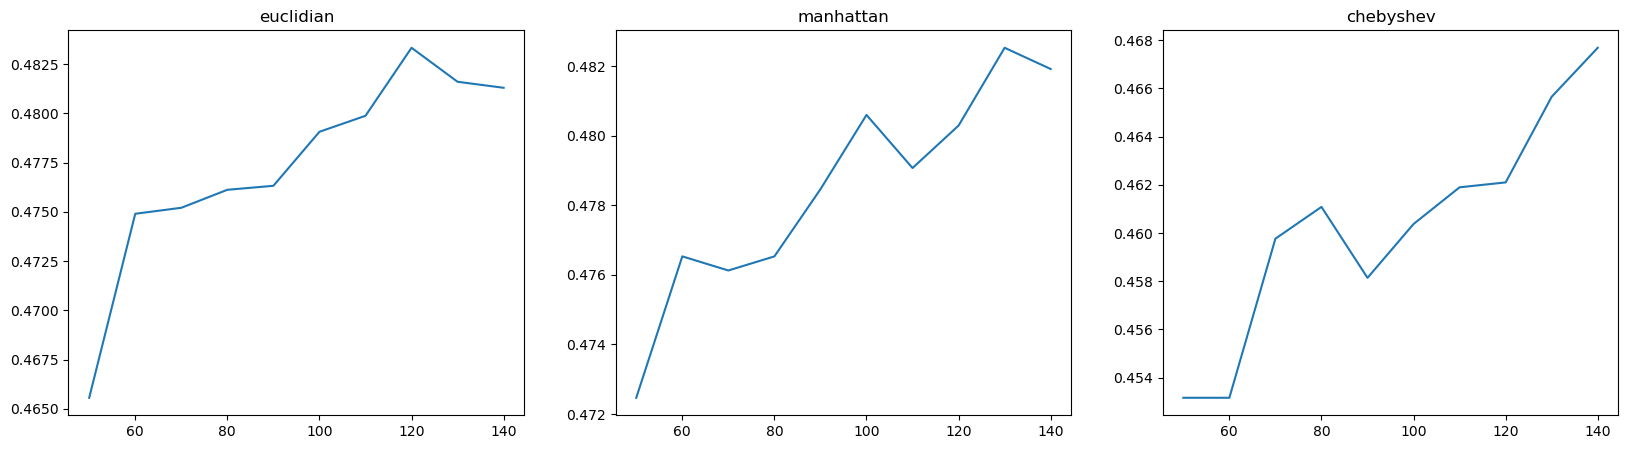

In [91]:
euclidian = grid_search2.cv_results_['mean_test_score'][:len(n_neighbors2)]
manhattan = grid_search2.cv_results_['mean_test_score'][len(n_neighbors2):2*len(n_neighbors2)]
chebyshev = grid_search2.cv_results_['mean_test_score'][2*len(n_neighbors2):]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
ax1.plot(n_neighbors2, euclidian)
ax1.set_title('euclidian')
ax2.plot(n_neighbors2, manhattan)
ax2.set_title('manhattan')
ax3.plot(n_neighbors2, chebyshev)
ax3.set_title('chebyshev')

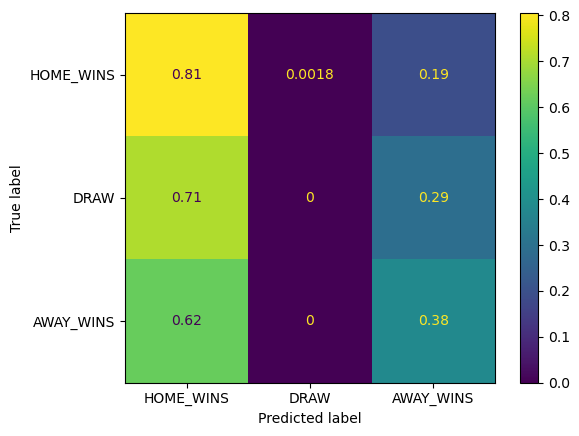

In [125]:
y_pred = grid_search.predict(imputer.transform(X_test))
cm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(cm, display_labels=['HOME_WINS', 'DRAW', 'AWAY_WINS']).plot()

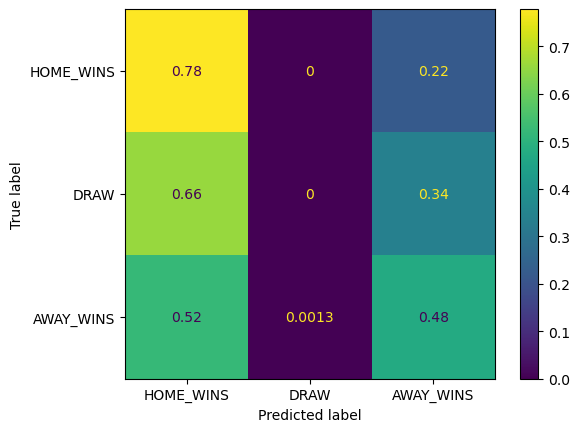

In [123]:
y_pred2 = grid_search2.predict(imputer.transform(X_test))
cm = confusion_matrix(y_test, y_pred2, normalize='true')
ConfusionMatrixDisplay(cm, display_labels=['HOME_WINS', 'DRAW', 'AWAY_WINS']).plot()